<a href="https://colab.research.google.com/github/othyTim/Prediction-of-Product-Sales/blob/main/Data_Cleanup_on_Data_Sales%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

In [17]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
dfs = pd.read_csv(fpath)
dfs.info()
dfs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

### Checking # of Rows and Columns

In [18]:
#row and column count
dfs.shape

(8523, 12)

In [19]:
#Data Types check
dfs.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Checking for Duplications

In [20]:
#Checking Duplication count
dfs.duplicated().sum()

0

### Check for Missing Values and replace with Placeholders

In [21]:
#missing Values
null_values = dfs.isna().sum()
null_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
type(null_values)

pandas.core.series.Series

In [23]:
#calculate the percentage of Null values per Feature
null_values/len(dfs) * 100


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [24]:
#Filling Null values  for 'Item_Weight' type float as -1
dfs['Item_Weight'] = dfs['Item_Weight'].fillna(-1)
dfs['Item_Weight'].isna().sum()

0

In [25]:
#Filling Null values  for 'Outlet_Size' type Object as "Unknown"
dfs['Outlet_Size'] = dfs['Outlet_Size'].fillna('Unknown')
dfs['Outlet_Size'].isna().sum()

0

In [26]:
dfs.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Identify and normalize Inconsistencies in the Categories

In [27]:
# Identify string columns
string_cols = dfs.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [28]:
 #Identyfy inconsistent Categories
for col in string_cols:
  print(f'Value counts for {col}')
  print(dfs[col].value_counts())

  print('\n')

Value counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [29]:
#Inconsistent Category found: 'Item_Fat_Content'
#Replace 'LF' and 'low fat' to 'Low Fat'
#Replace 'reg' to 'Regular'
dfs['Item_Fat_Content'] = dfs['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'})
dfs['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Summary Statitics of the data

In [30]:
#Summary Statitics of the data:
dfs.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Understanding our dataset through chart

## Correlation of the dataset

In [31]:
corr = dfs.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


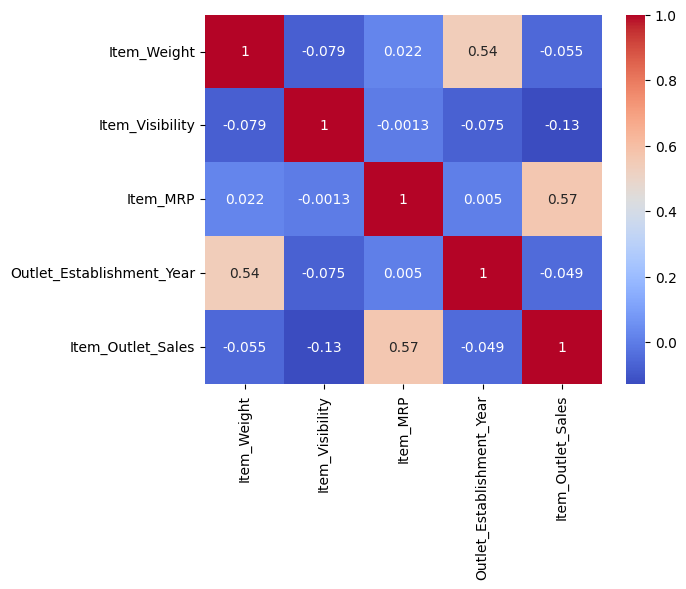

In [48]:
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

The strongest positive correlation is the Items_outlet_Sales and Item MRP(max Retail Price)

In [40]:
#ax = sns.barplot(data=dfs, y='Item_MRP', x='Item_Outlet_Sales')

## Lets Review Average sales per outlet type

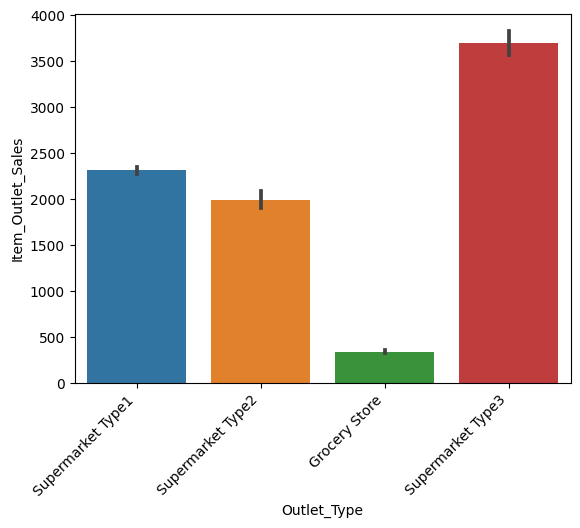

In [46]:
ax = sns.barplot(data=dfs, x='Outlet_Type', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

The Barplot above indictes that Supermarket type 3 has the highest average sales

### Lets review Average sales per Item type accross all Store types

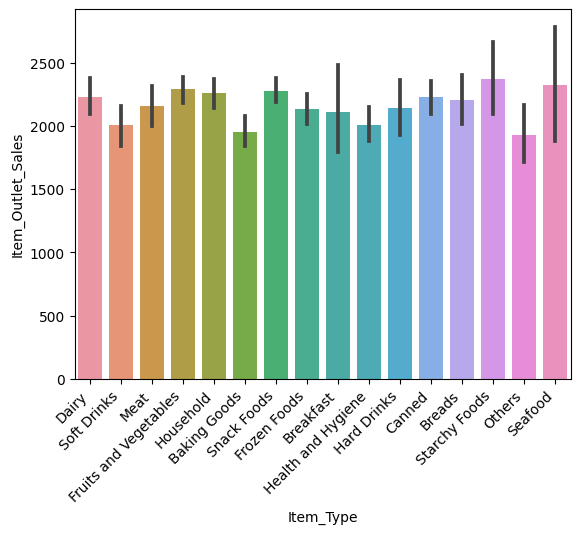

In [47]:
ax = sns.barplot(data=dfs, x='Item_Type', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

Lets Review Highest sales according to Max Retail Price

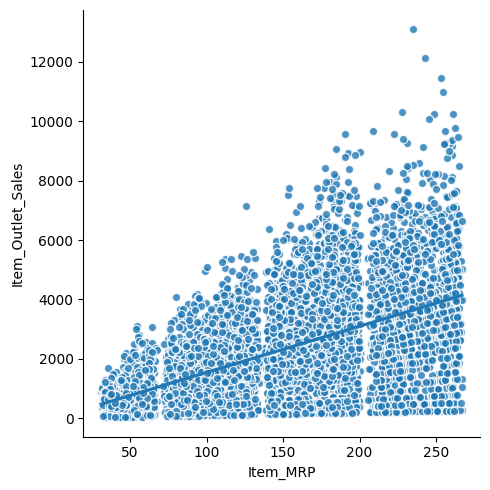

In [57]:
line_kws = dict(color='black')
scatter_kws = dict(edgecolor='white')
g = sns.lmplot(data=dfs, x='Item_MRP', y='Item_Outlet_Sales',
               scatter_kws=scatter_kws)



The lmplot above indicates the Items that has a high Max Retail Price has higher sales than item with a low MRP

## Lets review Number of Items occurance in our dataset

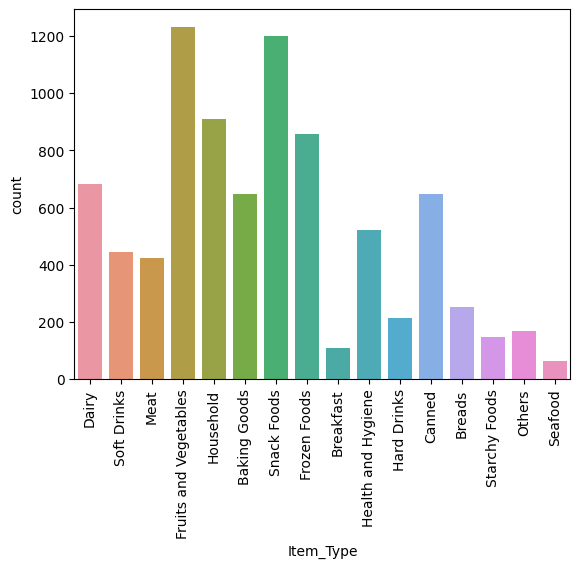

In [72]:
ax = sns.countplot(data=dfs, x='Item_Type')
ax.tick_params(axis='x', rotation=90)


The countplot above indicates that Fruits and Vegetables and Snack foods are highest stocked items amongest the stores

## Lets Review Sales between Regular and Fat free items

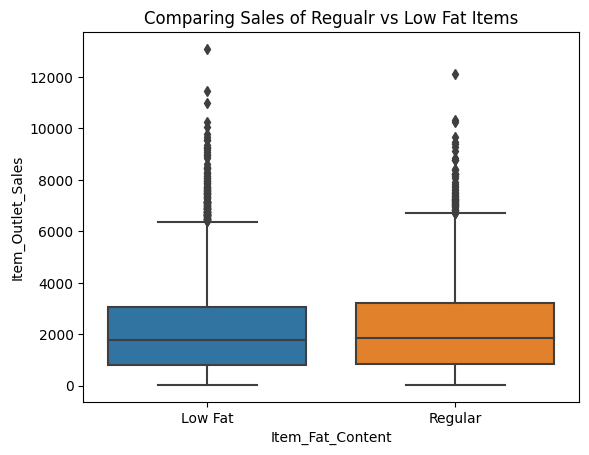

In [62]:
ax = sns.boxplot(data=dfs, x='Item_Fat_Content', y='Item_Outlet_Sales')
ax.set_title('Comparing Sales of Regualr vs Low Fat Items');

The Boxplot above indicates there are many outliers that fall well outside of the distribution pattern

## Lets Review frequency of sales number in our dataset

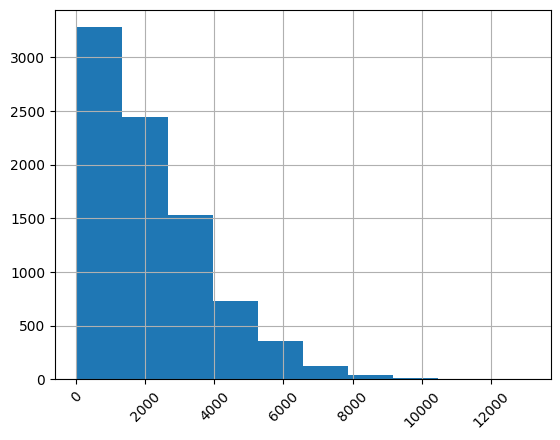

In [66]:
ax = dfs['Item_Outlet_Sales'].hist()
ax.tick_params(axis='x', rotation=45)


The above Histogram indicates that the lower sales number appears more frequent in our data set. meaning that most number of items sold are between 0-2000